<a href="https://colab.research.google.com/github/giuliovv/trajectory_planning/blob/master/derivate_prof_fagiano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import sympy
from sympy import Symbol, Sum, IndexedBase, Matrix
from sympy.parsing.sympy_parser import parse_expr

In [43]:
a = IndexedBase("alpha", "i")
xr = IndexedBase("x_r", "i")
yr = IndexedBase("y_r", "i")
xl = IndexedBase("x_l", "i")
yl = IndexedBase("y_l", "i")

x = IndexedBase("x", "i")
y = IndexedBase("y", "i")

kp = Symbol("k_p")
kl = Symbol("k_l")

i = Symbol("i")
N = Symbol("N")

g = Symbol("gamma")

In [44]:
import matplotlib.pyplot as plt

In [45]:
def print_latex(text, title="", fontsize=40):
  lat = sympy.latex(text)

  #add text                                                                       
  plt.text(0, 0.5, r"$%s = %s$" % (title, lat), fontsize=fontsize)                                  

  # #hide axes                                                                      
  fig = plt.gca()
  fig.axis('off')
  plt.draw()

## Formulation

In [46]:
A = Matrix([[x[i-1], y[i-1], 1], [x[i], y[i], 1], [x[i+1], y[i+1], 1]])
A

Matrix([
[x[i - 1], y[i - 1], 1],
[    x[i],     y[i], 1],
[x[i + 1], y[i + 1], 1]])

In [47]:
b = Matrix([x[i-1]**2+y[i-1]**2, x[i]**2+y[i]**2, x[i+1]**2+y[i+1]**2])
b

Matrix([
[x[i - 1]**2 + y[i - 1]**2],
[        x[i]**2 + y[i]**2],
[x[i + 1]**2 + y[i + 1]**2]])

In [48]:
param = A.inv()*b
param

Matrix([
[                                              (x[i + 1]**2 + y[i + 1]**2)*(y[i - 1] - y[i])/(x[i + 1]*y[i - 1] - x[i + 1]*y[i] - x[i - 1]*y[i + 1] + x[i - 1]*y[i] + x[i]*y[i + 1] - x[i]*y[i - 1]) + (x[i - 1]**2 + y[i - 1]**2)*(-y[i + 1] + y[i])/(x[i + 1]*y[i - 1] - x[i + 1]*y[i] - x[i - 1]*y[i + 1] + x[i - 1]*y[i] + x[i]*y[i + 1] - x[i]*y[i - 1]) + (x[i]**2 + y[i]**2)*(y[i + 1] - y[i - 1])/(x[i + 1]*y[i - 1] - x[i + 1]*y[i] - x[i - 1]*y[i + 1] + x[i - 1]*y[i] + x[i]*y[i + 1] - x[i]*y[i - 1])],
[                                             (-x[i + 1] + x[i - 1])*(x[i]**2 + y[i]**2)/(x[i + 1]*y[i - 1] - x[i + 1]*y[i] - x[i - 1]*y[i + 1] + x[i - 1]*y[i] + x[i]*y[i + 1] - x[i]*y[i - 1]) + (x[i + 1] - x[i])*(x[i - 1]**2 + y[i - 1]**2)/(x[i + 1]*y[i - 1] - x[i + 1]*y[i] - x[i - 1]*y[i + 1] + x[i - 1]*y[i] + x[i]*y[i + 1] - x[i]*y[i - 1]) + (x[i + 1]**2 + y[i + 1]**2)*(-x[i - 1] + x[i])/(x[i + 1]*y[i - 1] - x[i + 1]*y[i] - x[i - 1]*y[i + 1] + x[i - 1]*y[i] + x[i]*y[i + 1] - x[i]*y[i

In [49]:
center = Matrix([param[0]/2, param[1]/2])
center

Matrix([
[ (x[i + 1]**2 + y[i + 1]**2)*(y[i - 1] - y[i])/(2*(x[i + 1]*y[i - 1] - x[i + 1]*y[i] - x[i - 1]*y[i + 1] + x[i - 1]*y[i] + x[i]*y[i + 1] - x[i]*y[i - 1])) + (x[i - 1]**2 + y[i - 1]**2)*(-y[i + 1] + y[i])/(2*(x[i + 1]*y[i - 1] - x[i + 1]*y[i] - x[i - 1]*y[i + 1] + x[i - 1]*y[i] + x[i]*y[i + 1] - x[i]*y[i - 1])) + (x[i]**2 + y[i]**2)*(y[i + 1] - y[i - 1])/(2*(x[i + 1]*y[i - 1] - x[i + 1]*y[i] - x[i - 1]*y[i + 1] + x[i - 1]*y[i] + x[i]*y[i + 1] - x[i]*y[i - 1]))],
[(-x[i + 1] + x[i - 1])*(x[i]**2 + y[i]**2)/(2*(x[i + 1]*y[i - 1] - x[i + 1]*y[i] - x[i - 1]*y[i + 1] + x[i - 1]*y[i] + x[i]*y[i + 1] - x[i]*y[i - 1])) + (x[i + 1] - x[i])*(x[i - 1]**2 + y[i - 1]**2)/(2*(x[i + 1]*y[i - 1] - x[i + 1]*y[i] - x[i - 1]*y[i + 1] + x[i - 1]*y[i] + x[i]*y[i + 1] - x[i]*y[i - 1])) + (x[i + 1]**2 + y[i + 1]**2)*(-x[i - 1] + x[i])/(2*(x[i + 1]*y[i - 1] - x[i + 1]*y[i] - x[i - 1]*y[i + 1] + x[i - 1]*y[i] + x[i]*y[i + 1] - x[i]*y[i - 1]))]])

In [50]:
radius = sympy.sqrt(center[0]**2+center[1]**2+param[2])
radius

sqrt((x[i + 1]*y[i - 1] - x[i - 1]*y[i + 1])*(x[i]**2 + y[i]**2)/(x[i + 1]*y[i - 1] - x[i + 1]*y[i] - x[i - 1]*y[i + 1] + x[i - 1]*y[i] + x[i]*y[i + 1] - x[i]*y[i - 1]) + (-x[i + 1]*y[i] + x[i]*y[i + 1])*(x[i - 1]**2 + y[i - 1]**2)/(x[i + 1]*y[i - 1] - x[i + 1]*y[i] - x[i - 1]*y[i + 1] + x[i - 1]*y[i] + x[i]*y[i + 1] - x[i]*y[i - 1]) + (x[i - 1]*y[i] - x[i]*y[i - 1])*(x[i + 1]**2 + y[i + 1]**2)/(x[i + 1]*y[i - 1] - x[i + 1]*y[i] - x[i - 1]*y[i + 1] + x[i - 1]*y[i] + x[i]*y[i + 1] - x[i]*y[i - 1]) + ((-x[i + 1] + x[i - 1])*(x[i]**2 + y[i]**2)/(2*(x[i + 1]*y[i - 1] - x[i + 1]*y[i] - x[i - 1]*y[i + 1] + x[i - 1]*y[i] + x[i]*y[i + 1] - x[i]*y[i - 1])) + (x[i + 1] - x[i])*(x[i - 1]**2 + y[i - 1]**2)/(2*(x[i + 1]*y[i - 1] - x[i + 1]*y[i] - x[i - 1]*y[i + 1] + x[i - 1]*y[i] + x[i]*y[i + 1] - x[i]*y[i - 1])) + (x[i + 1]**2 + y[i + 1]**2)*(-x[i - 1] + x[i])/(2*(x[i + 1]*y[i - 1] - x[i + 1]*y[i] - x[i - 1]*y[i + 1] + x[i - 1]*y[i] + x[i]*y[i + 1] - x[i]*y[i - 1])))**2 + ((x[i + 1]**2 + y[i + 1]*

In [51]:
rho = 1/radius
rho

1/sqrt((x[i + 1]*y[i - 1] - x[i - 1]*y[i + 1])*(x[i]**2 + y[i]**2)/(x[i + 1]*y[i - 1] - x[i + 1]*y[i] - x[i - 1]*y[i + 1] + x[i - 1]*y[i] + x[i]*y[i + 1] - x[i]*y[i - 1]) + (-x[i + 1]*y[i] + x[i]*y[i + 1])*(x[i - 1]**2 + y[i - 1]**2)/(x[i + 1]*y[i - 1] - x[i + 1]*y[i] - x[i - 1]*y[i + 1] + x[i - 1]*y[i] + x[i]*y[i + 1] - x[i]*y[i - 1]) + (x[i - 1]*y[i] - x[i]*y[i - 1])*(x[i + 1]**2 + y[i + 1]**2)/(x[i + 1]*y[i - 1] - x[i + 1]*y[i] - x[i - 1]*y[i + 1] + x[i - 1]*y[i] + x[i]*y[i + 1] - x[i]*y[i - 1]) + ((-x[i + 1] + x[i - 1])*(x[i]**2 + y[i]**2)/(2*(x[i + 1]*y[i - 1] - x[i + 1]*y[i] - x[i - 1]*y[i + 1] + x[i - 1]*y[i] + x[i]*y[i + 1] - x[i]*y[i - 1])) + (x[i + 1] - x[i])*(x[i - 1]**2 + y[i - 1]**2)/(2*(x[i + 1]*y[i - 1] - x[i + 1]*y[i] - x[i - 1]*y[i + 1] + x[i - 1]*y[i] + x[i]*y[i + 1] - x[i]*y[i - 1])) + (x[i + 1]**2 + y[i + 1]**2)*(-x[i - 1] + x[i])/(2*(x[i + 1]*y[i - 1] - x[i + 1]*y[i] - x[i - 1]*y[i + 1] + x[i - 1]*y[i] + x[i]*y[i + 1] - x[i]*y[i - 1])))**2 + ((x[i + 1]**2 + y[i + 1

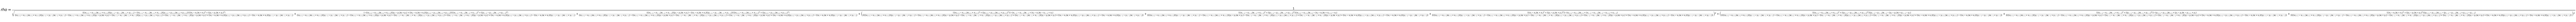

In [52]:
rho = rho \
    .subs(x[i+1], xr[i+1]+a[i+1]*(xl[i+1]-xr[i+1])) \
    .subs(x[i], xr[i]+a[i]*(xl[i]-xr[i])) \
    .subs(x[i-1], xr[i-1]+a[i-1]*(xl[i-1]-xr[i-1])) \
    .subs(y[i], yr[i]+a[i]*(yl[i]-yr[i])) \
    .subs(y[i+1], yr[i+1]+a[i+1]*(yl[i+1]-yr[i+1])) \
    .subs(y[i-1], yr[i-1]+a[i-1]*(yl[i-1]-yr[i-1])) \
    # + g*sympy.Max(0, a[i]-1) + g*sympy.Min(0, a[i]) # Constraint


print_latex(rho, title="rho")

In [53]:
Jr = sympy.sqrt(kp)*rho
Jr

sqrt(k_p)/sqrt((((x_l[i + 1] - x_r[i + 1])*alpha[i + 1] + x_r[i + 1])*((y_l[i - 1] - y_r[i - 1])*alpha[i - 1] + y_r[i - 1]) - ((x_l[i - 1] - x_r[i - 1])*alpha[i - 1] + x_r[i - 1])*((y_l[i + 1] - y_r[i + 1])*alpha[i + 1] + y_r[i + 1]))*(((x_l[i] - x_r[i])*alpha[i] + x_r[i])**2 + ((y_l[i] - y_r[i])*alpha[i] + y_r[i])**2)/(((x_l[i + 1] - x_r[i + 1])*alpha[i + 1] + x_r[i + 1])*((y_l[i - 1] - y_r[i - 1])*alpha[i - 1] + y_r[i - 1]) - ((x_l[i + 1] - x_r[i + 1])*alpha[i + 1] + x_r[i + 1])*((y_l[i] - y_r[i])*alpha[i] + y_r[i]) - ((x_l[i - 1] - x_r[i - 1])*alpha[i - 1] + x_r[i - 1])*((y_l[i + 1] - y_r[i + 1])*alpha[i + 1] + y_r[i + 1]) + ((x_l[i - 1] - x_r[i - 1])*alpha[i - 1] + x_r[i - 1])*((y_l[i] - y_r[i])*alpha[i] + y_r[i]) + ((x_l[i] - x_r[i])*alpha[i] + x_r[i])*((y_l[i + 1] - y_r[i + 1])*alpha[i + 1] + y_r[i + 1]) - ((x_l[i] - x_r[i])*alpha[i] + x_r[i])*((y_l[i - 1] - y_r[i - 1])*alpha[i - 1] + y_r[i - 1])) + (-((x_l[i + 1] - x_r[i + 1])*alpha[i + 1] + x_r[i + 1])*((y_l[i] - y_r[i])*alpha[

## Gradient

In [54]:
def to_matlab(der):
  return sympy.ccode(der) \
    .replace("x_l[i]", "leftpoints(idx, 1)") \
    .replace("x_l[i + 1]", "leftpoints(idx+1, 1)") \
    .replace("x_r[i]", "rightpoints(idx, 1)") \
    .replace("x_r[i + 1]", "rightpoints(idx+1, 1)") \
    .replace("y_l[i]", "leftpoints(idx, 2)") \
    .replace("y_l[i + 1]", "leftpoints(idx+1, 2)") \
    .replace("y_r[i]", "rightpoints(idx, 2)") \
    .replace("y_r[i + 1]", "rightpoints(idx+1, 2)") \
    .replace("x_l[i - 1]", "leftpoints(idx-1, 1)") \
    .replace("y_l[i - 1]", "leftpoints(idx-1, 2)") \
    .replace("x_r[i - 1]", "rightpoints(idx-1, 1)") \
    .replace("y_r[i - 1]", "rightpoints(idx-1, 2)") \
    .replace("alpha[i]", "alpha(idx)") \
    .replace("alpha[i + 1]", "alpha(idx+1)") \
    .replace("alpha[i - 1]", "alpha(idx-1)") \
    .replace("pow", "power")

In [55]:
# d/a
gradient_jr = Jr.diff(a[i])
gradient_code_jr = to_matlab(gradient_jr)
gradient_code_jr

'sqrt(k_p)*(-1.0/2.0*((-(leftpoints(idx+1, 1) - rightpoints(idx+1, 1))*alpha(idx+1) - rightpoints(idx+1, 1))*(leftpoints(idx, 2) - rightpoints(idx, 2)) + ((leftpoints(idx+1, 2) - rightpoints(idx+1, 2))*alpha(idx+1) + rightpoints(idx+1, 2))*(leftpoints(idx, 1) - rightpoints(idx, 1)))*(power((leftpoints(idx-1, 1) - rightpoints(idx-1, 1))*alpha(idx-1) + rightpoints(idx-1, 1), 2) + power((leftpoints(idx-1, 2) - rightpoints(idx-1, 2))*alpha(idx-1) + rightpoints(idx-1, 2), 2))/(((leftpoints(idx+1, 1) - rightpoints(idx+1, 1))*alpha(idx+1) + rightpoints(idx+1, 1))*((leftpoints(idx-1, 2) - rightpoints(idx-1, 2))*alpha(idx-1) + rightpoints(idx-1, 2)) - ((leftpoints(idx+1, 1) - rightpoints(idx+1, 1))*alpha(idx+1) + rightpoints(idx+1, 1))*((leftpoints(idx, 2) - rightpoints(idx, 2))*alpha(idx) + rightpoints(idx, 2)) - ((leftpoints(idx-1, 1) - rightpoints(idx-1, 1))*alpha(idx-1) + rightpoints(idx-1, 1))*((leftpoints(idx+1, 2) - rightpoints(idx+1, 2))*alpha(idx+1) + rightpoints(idx+1, 2)) + ((leftpoi

In [56]:
# d/a+1
gradient_jr = Jr.diff(a[i+1])
gradient_code_jr = to_matlab(gradient_jr)
gradient_code_jr

'sqrt(k_p)*(-1.0/2.0*(((leftpoints(idx+1, 1) - rightpoints(idx+1, 1))*alpha(idx+1) + rightpoints(idx+1, 1))*((leftpoints(idx-1, 2) - rightpoints(idx-1, 2))*alpha(idx-1) + rightpoints(idx-1, 2)) - ((leftpoints(idx-1, 1) - rightpoints(idx-1, 1))*alpha(idx-1) + rightpoints(idx-1, 1))*((leftpoints(idx+1, 2) - rightpoints(idx+1, 2))*alpha(idx+1) + rightpoints(idx+1, 2)))*(power((leftpoints(idx, 1) - rightpoints(idx, 1))*alpha(idx) + rightpoints(idx, 1), 2) + power((leftpoints(idx, 2) - rightpoints(idx, 2))*alpha(idx) + rightpoints(idx, 2), 2))*(-(-(leftpoints(idx-1, 1) - rightpoints(idx-1, 1))*alpha(idx-1) - rightpoints(idx-1, 1))*(leftpoints(idx+1, 2) - rightpoints(idx+1, 2)) - ((leftpoints(idx, 1) - rightpoints(idx, 1))*alpha(idx) + rightpoints(idx, 1))*(leftpoints(idx+1, 2) - rightpoints(idx+1, 2)) - ((leftpoints(idx-1, 2) - rightpoints(idx-1, 2))*alpha(idx-1) + rightpoints(idx-1, 2))*(leftpoints(idx+1, 1) - rightpoints(idx+1, 1)) - ((leftpoints(idx, 2) - rightpoints(idx, 2))*alpha(idx) 

In [57]:
# d/a-1
gradient_jr = Jr.diff(a[i-1])
gradient_code_jr = to_matlab(gradient_jr)
gradient_code_jr

'sqrt(k_p)*(-1.0/2.0*(((leftpoints(idx+1, 1) - rightpoints(idx+1, 1))*alpha(idx+1) + rightpoints(idx+1, 1))*((leftpoints(idx-1, 2) - rightpoints(idx-1, 2))*alpha(idx-1) + rightpoints(idx-1, 2)) - ((leftpoints(idx-1, 1) - rightpoints(idx-1, 1))*alpha(idx-1) + rightpoints(idx-1, 1))*((leftpoints(idx+1, 2) - rightpoints(idx+1, 2))*alpha(idx+1) + rightpoints(idx+1, 2)))*(power((leftpoints(idx, 1) - rightpoints(idx, 1))*alpha(idx) + rightpoints(idx, 1), 2) + power((leftpoints(idx, 2) - rightpoints(idx, 2))*alpha(idx) + rightpoints(idx, 2), 2))*(-((leftpoints(idx+1, 1) - rightpoints(idx+1, 1))*alpha(idx+1) + rightpoints(idx+1, 1))*(leftpoints(idx-1, 2) - rightpoints(idx-1, 2)) - (-(leftpoints(idx, 1) - rightpoints(idx, 1))*alpha(idx) - rightpoints(idx, 1))*(leftpoints(idx-1, 2) - rightpoints(idx-1, 2)) - ((leftpoints(idx+1, 2) - rightpoints(idx+1, 2))*alpha(idx+1) + rightpoints(idx+1, 2))*(-leftpoints(idx-1, 1) + rightpoints(idx-1, 1)) - ((leftpoints(idx, 2) - rightpoints(idx, 2))*alpha(idx)